### Import StockX 2019 Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\Playtech\Desktop\StockX-Data-Contest-2019-3.csv')


### Converting data types

In [2]:
df['Sale Price'] = df['Sale Price'].replace('[\$,]', '', regex=True).astype(float)
df['Retail Price'] = df['Retail Price'].replace('[\$,]', '', regex=True).astype(float)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Release Date'] = pd.to_datetime(df['Release Date'])

### Add in Profit and Profit Margin % columns

In [3]:
df['Profit'] = df['Sale Price'] - df['Retail Price']
df['Profit Margin %'] = (( df['Sale Price'] - df['Retail Price'] ) /  df['Retail Price']) * 100


### Add in Month, Year and Day of the Week columns


In [4]:
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df['Day of Week'] = pd.to_datetime(df['Order Date']).dt.day_name()
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit,Profit Margin %,Year,Month,Day of Week
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,2016-09-24,11.0,California,877.0,398.636364,2017,9,Friday
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,2016-11-23,11.0,California,465.0,211.363636,2017,9,Friday
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,2016-11-23,11.0,California,470.0,213.636364,2017,9,Friday
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,2016-11-23,11.5,Kentucky,855.0,388.636364,2017,9,Friday
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2017-02-11,11.0,Rhode Island,608.0,276.363636,2017,9,Friday


### Calculate and show sum of profit per month

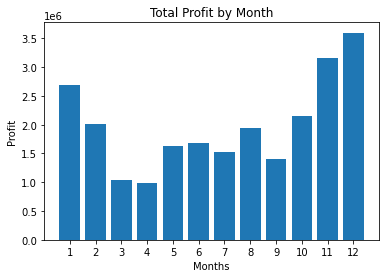

In [5]:
profit_per_month = df.groupby('Month').sum()['Profit']
months = range(1,13)

plt.bar(months, profit_per_month)
plt.xticks(months)
plt.title('Total Profit by Month')
plt.xlabel('Months')
plt.ylabel('Profit')
plt.show()

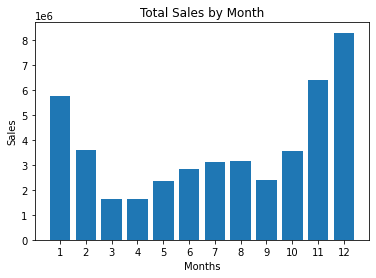

In [6]:
sales_per_month = df.groupby('Month').sum()['Sale Price']
months = range(1,13)

plt.bar(months, sales_per_month)
plt.xticks(months)
plt.title('Total Sales by Month')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

### Calculate the number of sales made per month

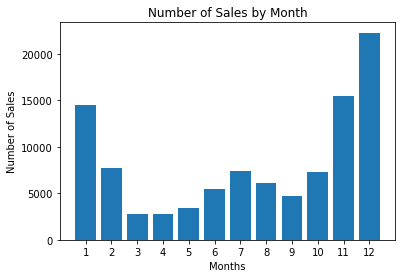

In [7]:
count_per_month = df.groupby('Month').count()['Order Date']
months = range(1,13)

plt.bar(months, count_per_month)
plt.xticks(months)
plt.title('Number of Sales by Month')
plt.xlabel('Months')
plt.ylabel('Number of Sales')
plt.show()

We can see from the graph above that there are fewer sales around March and April. picking back up around June and July in the summer period. The peak sales are around the end of the year during the holiday periods. One could suggest holding promotions such as "Free shipping" around those months where there are fewer sales to encourage buyers to purchase a pair of sneakers.

#### Sales by Day of the Week

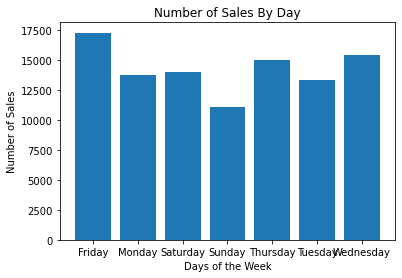

In [8]:
count_per_day = df.groupby('Day of Week')['Order Date'].count().reset_index(name='count')
days = [day for day, df in df.groupby('Day of Week')]
plt.bar(days, count_per_day['count'])
plt.title("Number of Sales By Day")
plt.xlabel("Days of the Week")
plt.ylabel("Number of Sales")
plt.show()


Friday has the highest number of sales and Sunday has the least number of sales. with the rest of the days being similar in number.


#### Show total sales count, sales, and profit for each brand.

In [9]:

df.groupby('Brand').agg({'Sneaker Name':'count', 'Sale Price': 'sum','Profit': 'sum'}).head()

,Sneaker Name,Sale Price,Profit
Brand,,,
Yeezy,72162,25980669.0,10114129.0
Off-White,27794,18663151.0,13677511.0


Yeezy sold nearly 3 times more than Off-White and made more in total sales. However, Off-White products accumulated more profit. This tells us that Off-White products must be selling for more than their retail price compared to Yeezy products.

#### Let's look at the top 10 selling sneakers

In [9]:
product_count = df.groupby('Sneaker Name').count()['Order Date'].reset_index(name='count')
product_count.sort_values('count', ascending=False).head(10)
#products_count.sort_values('Sneaker Name', ascending=False)

,Sneaker Name,count
47,adidas-Yeezy-Boost-350-V2-Butter,11423
6,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10395
16,Adidas-Yeezy-Boost-350-V2-Zebra,10110
7,Adidas-Yeezy-Boost-350-V2-Blue-Tint,9297
13,Adidas-Yeezy-Boost-350-V2-Cream-White,9097
15,Adidas-Yeezy-Boost-350-V2-Sesame,5553
48,adidas-Yeezy-Boost-350-V2-Static,4983
14,Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow,4854
18,Air-Jordan-1-Retro-High-Off-White-University-Blue,4635
49,adidas-Yeezy-Boost-350-V2-Static-Reflective,3184


We can see that 9 out of 10 sneakers are from Yeezy and only 1 from Off-White. Yeezy seem to be more popular than Off-White.

### Let's find out what could be the cause of this
#### Let's look at the mean sale price of both brands.

In [11]:
df.groupby('Brand')['Sale Price'].mean().reset_index(name='Mean sale price').round(2).head()


,Brand,Mean sale price
0,Yeezy,360.03
1,Off-White,671.48


#### Mean profit margin %

In [12]:
df.groupby('Brand')['Profit Margin %'].mean().reset_index(name='Mean Profit Margin').round(2).head()

,Brand,Mean Profit Margin
0,Yeezy,63.95
1,Off-White,282.87


#### The number of unique products for each brand

In [13]:
df.groupby('Brand').agg({'Sneaker Name':'nunique'})

,Sneaker Name
Brand,
Yeezy,20
Off-White,30


We can see there are fewer Yeezy products being sold than Off-White, but more Yeezy products have been sold over time. This may be the case due to Yeezys' having a lower mean selling price, thus being more affordable to more people.

Although Off-White products have a bigger profit margin, this is important to the seller but not as much to the buyer or StockX.

StockX is a platform that acts as a medium to help buyers purchase their sneakers safely and sellers sell their sneakers to potential customers around the world. They generate income through commission fees gathered from the sale price.

By analysing the data, we can say that StockX has generated more income through commission from Yeezy than Off-White. Even with a lower average sales price, by selling nearly 3 times more, it has higher total sales than Off-White.


### Finally let's look at the data per region

#### Sales per Region

In [14]:
df.groupby('Buyer Region')['Buyer Region'].count().sort_values(ascending=False).reset_index(name='count').head()

,Buyer Region,count
0,California,19349
1,New York,16525
2,Oregon,7681
3,Florida,6376
4,Texas,5876


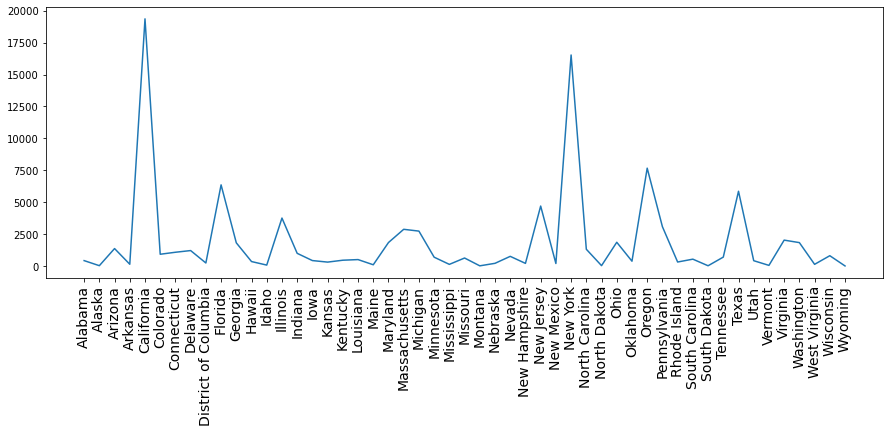

In [16]:
sale_per_region = df.groupby('Buyer Region')['Buyer Region'].count().reset_index(name='count')
regions = [region for region, df in df.groupby('Buyer Region')]

plt.plot(regions, sale_per_region['count'])
plt.xticks(rotation=90,fontsize=14)
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

We can see that California has the highest number of sales, followed by New York. This is likely due to population size of each region.


#### The mean sales price by region

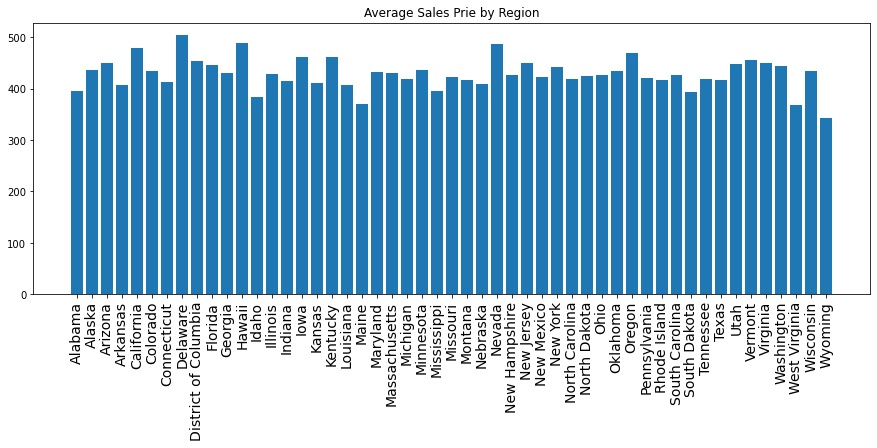

In [17]:
avg_sale_per_region = df.groupby('Buyer Region')['Sale Price'].mean().reset_index(name='Average')
sale_regions = [region for region, df in df.groupby('Buyer Region')]

plt.bar(sale_regions, avg_sale_per_region['Average'])
plt.xticks(rotation=90,fontsize=14)
plt.rcParams["figure.figsize"] = (15,5)
plt.title("Average Sales Prie by Region")
plt.show()

Average sales prices are similar across the board in the 400 - 450 price range. With Delaware being the highest at 500 and Wyoming being the lowest at around 350. We must keep in mind that Wyoming only had 40 sales, meaning a sale with a very high price or low price could have a big effect on the average sales price for Wyoming. This can also be said for all other regions with a small number of sales.